<a href="https://colab.research.google.com/github/yankit247/Different-Machine-Learning-Models/blob/main/Earthquake_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Dataset

In [ ]:
import pandas as pd
from google.colab import data_table

# Enable the data table formatter
data_table.enable_dataframe_formatter()

# Read CSV file with space delimiter
df = pd.read_csv('Earthquake_Data.csv', delimiter=r'\s+')

# Print the first 5 rows of the data frame
df.head()

Date(YYYY/MM/DD)         Time  Latitude  Longitude  Depth  Mag Magt  Nst  \
0       1966/07/01  09:41:21.82   35.9463  -120.4700  12.26  3.2   Mx    7   
1       1966/07/02  12:08:34.25   35.7867  -120.3265   8.99  3.7   Mx    8   
2       1966/07/02  12:16:14.95   35.7928  -120.3353   9.88  3.4   Mx    8   
3       1966/07/02  12:25:06.12   35.7970  -120.3282   9.09  3.1   Mx    8   
4       1966/07/05  18:54:54.36   35.9223  -120.4585   7.86  3.1   Mx    9   

   Gap  Clo   RMS   SRC  EventID  
0  171   20  0.02  NCSN -4540462  
1   86    3  0.04  NCSN -4540520  
2   89    2  0.03  NCSN -4540521  
3  101    3  0.08  NCSN -4540522  
4  161   14  0.04  NCSN -4540594

##Preprocessing
No preprocessing required because the data is already clean and structured.
We just have to change the column names to meaningful names.

In [ ]:
# Rename the columns
new_column_names = ["Date(YYYY/MM/DD)", "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)",
                    "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]
df.columns = new_column_names

# Combine the "Date(YYYY/MM/DD)" and "Time(UTC)" columns into a single datetime column
ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])

# Drop the original "Date(YYYY/MM/DD)" and "Time(UTC)" columns
df = df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1)

# Set the datetime column as the DataFrame index
df.index = ts

# Display the modified DataFrame using the interactive data table
display(df)

Latitude(deg)  Longitude(deg)  Depth(km)  \
1966-07-01 09:41:21.820        35.9463       -120.4700      12.26   
1966-07-02 12:08:34.250        35.7867       -120.3265       8.99   
1966-07-02 12:16:14.950        35.7928       -120.3353       9.88   
1966-07-02 12:25:06.120        35.7970       -120.3282       9.09   
1966-07-05 18:54:54.360        35.9223       -120.4585       7.86   
...                                ...             ...        ...   
1990-09-21 16:52:33.170        38.8008       -122.8068       1.10   
1990-09-21 18:25:15.380        40.3948       -124.4218      18.07   
1990-09-22 21:12:24.780        36.6600       -121.2877       8.62   
1990-09-22 21:14:11.240        36.6585       -121.2863       8.44   
1990-09-22 22:11:49.180        36.6577       -121.2862       8.62   

                         Magnitude(ergs) Magnitude_type  No_of_Stations  Gap  \
1966-07-01 09:41:21.820             3.20             Mx               7  171   
1966-07-02 12:08:34.250             3.70             Mx               8   86   
1966-07-02 12:16:14.950             3.40             Mx               8   89   
1966-07-02 12:25:06.120             3.10             Mx               8  101   
1966-07-05 18:54:54.360             3.10             Mx               9  161   
...                                  ...            ...             ...  ...   
1990-09-21 16:52:33.170             3.25             Md              43   31   
1990-09-21 18:25:15.380             3.03             Md              13  241   
1990-09-22 21:12:24.780             3.20             ML              79   35   
1990-09-22 21:14:11.240             3.20             ML              77   27   
1990-09-22 22:11:49.180             3.10             ML              77   25   

                         Close   RMS   SRC   EventID  
1966-07-01 09:41:21.820     20  0.02  NCSN  -4540462  
1966-07-02 12:08:34.250      3  0.04  NCSN  -4540520  
1966-07-02 12:16:14.950      2  0.03  NCSN  -4540521  
1966-07-02 12:25:06.120      3  0.08  NCSN  -4540522  
1966-07-05 18:54:54.360     14  0.04  NCSN  -4540594  
...                        ...   ...   ...       ...  
1990-09-21 16:52:33.170      1  0.13  NCSN    164400  
1990-09-21 18:25:15.380     11  0.03  NCSN    164367  
1990-09-22 21:12:24.780      1  0.05  NCSN  20092305  
1990-09-22 21:14:11.240      1  0.06  NCSN  20092317  
1990-09-22 22:11:49.180      2  0.06  NCSN      1645  

[10921 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10921 entries, 1966-07-01 09:41:21.820000 to 1990-09-22 22:11:49.180000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    10921 non-null  float64
 1   Longitude(deg)   10921 non-null  float64
 2   Depth(km)        10921 non-null  float64
 3   Magnitude(ergs)  10921 non-null  float64
 4   Magnitude_type   10921 non-null  object 
 5   No_of_Stations   10921 non-null  int64  
 6   Gap              10921 non-null  int64  
 7   Close            10921 non-null  int64  
 8   RMS              10921 non-null  float64
 9   SRC              10921 non-null  object 
 10  EventID          10921 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1023.8+ KB


##Export Preprocessed dataset
Export the data into xlsx file

In [ ]:
# Save the DataFrame to Excel
file_name = 'Earthquake_data_processed.xlsx'
df.to_excel(file_name, index=False)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Partition the data into Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split

# Select relevant columns
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
y = df['Magnitude(ergs)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Linear regression

<h3>Loading the model and fitting it with training data</h3>

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression()

<h3>Predict the testing data</h3>
Find the predicted values and evaluate it using metrics of linear regression

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

scores= {"Model name": ["Linear regression", "SVM", "Random Forest"], "mse": [], "R^2": []}

# Predict on the testing set
y_pred = Model.predict(X_test)

# Compute R^2 and MSE
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

scores['mse'].append(MSE)
scores['R^2'].append(R2)

print("R^2: {:.2f}, MSE: {:.2f}".format(R2, MSE))

R^2: 0.01, MSE: 0.20


<h3>Predict for new data</h3>



In [ ]:
# Define new data points
new_data = [[33.89, -118.40, 16.17, 11], [37.77, -122.42, 8.05, 14]]

# Predict using the trained model
new_pred = Model.predict(new_data)

# Print the predictions
print("New predictions:", new_pred)


New predictions: [3.45508833 3.35608888]


<h3>Plot multiple linear regression model</h3>

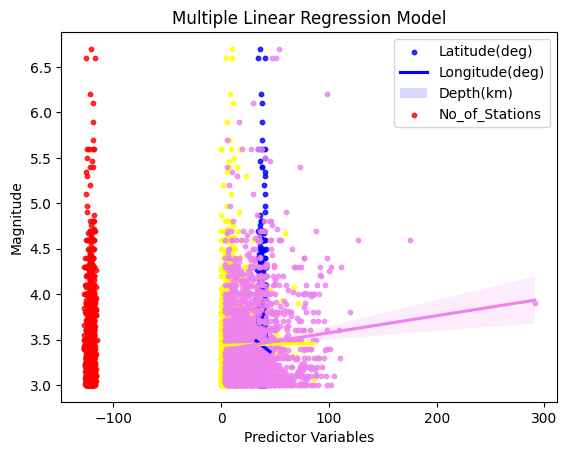

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the linear regression model (Model) and made predictions (y_pred)

# Plot the regression lines
sns.regplot(x=X_test['Latitude(deg)'], y=y_test, color='blue', scatter_kws={'s': 10})
sns.regplot(x=X_test['Longitude(deg)'], y=y_test, color='red', scatter_kws={'s': 10})
sns.regplot(x=X_test['Depth(km)'], y=y_test, color='yellow', scatter_kws={'s': 10})
sns.regplot(x=X_test['No_of_Stations'], y=y_test, color='violet', scatter_kws={'s': 10})

# Add legend and axis labels
plt.legend(labels=['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations'])
plt.xlabel('Predictor Variables')
plt.ylabel('Magnitude')

# Set the plot title
plt.title('Multiple Linear Regression Model')

# Display the plot
plt.show()


Data loaded and preprocessed successfully.
Linear regression model trained successfully.
R^2: 0.02, MSE: 0.19
New predictions: [3.447483   3.33027751]


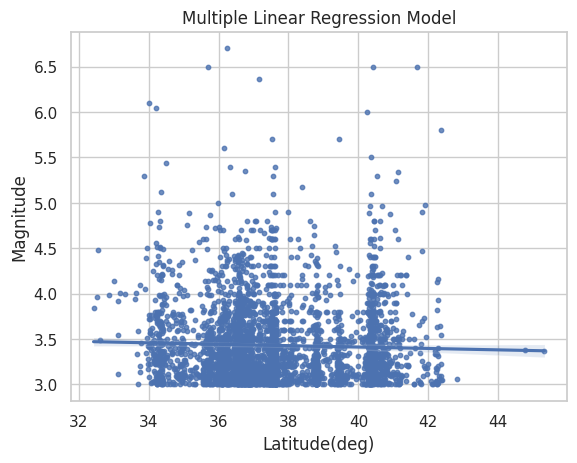

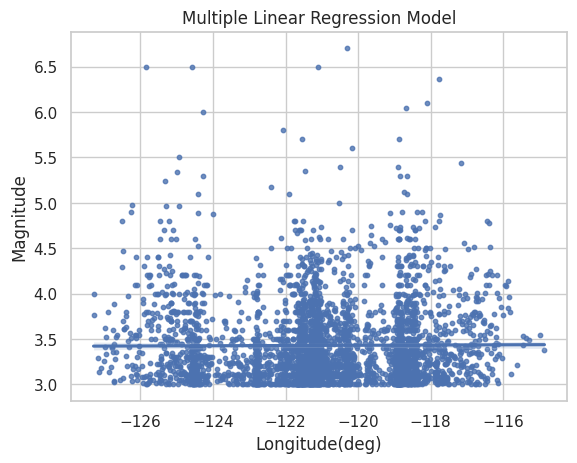

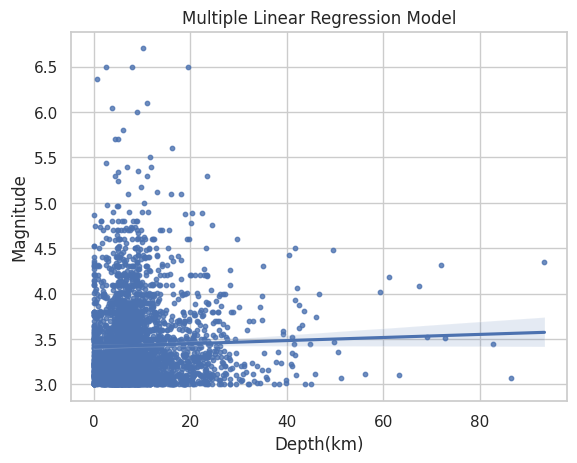

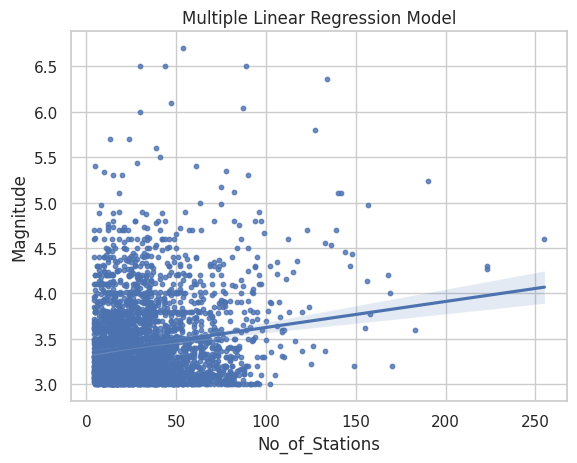

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path, delimiter=r'\s+')
    df.columns = ["Date(YYYY/MM/DD)", "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)",
                  "Magnitude(ergs)", "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

    ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
    df.index = ts
    df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1, inplace=True)

    return df

# Function to train a Linear Regression model
def train_linear_regression_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to evaluate the model and print scores
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

# Function to make predictions on new data
def predict_new_data(model, new_data):
    new_pred = model.predict(new_data)
    return new_pred

# Function to create visualization of regression lines
def visualize_regression_lines(X_test, y_test):
    sns.set(style="whitegrid")
    predictors = ['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']

    for predictor in predictors:
        plt.figure()
        sns.regplot(x=X_test[predictor], y=y_test, scatter_kws={'s': 10})
        plt.xlabel(predictor)
        plt.ylabel('Magnitude')
        plt.title('Multiple Linear Regression Model')

    plt.show()

def main():
    # Load and preprocess the data
    file_path = 'Earthquake_Data.csv'
    df = load_and_preprocess_data(file_path)
    print("Data loaded and preprocessed successfully.")

    # Select relevant columns
    X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
    y = df['Magnitude(ergs)']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the linear regression model
    model = train_linear_regression_model(X_train, y_train)
    print("Linear regression model trained successfully.")

    # Evaluate the model
    evaluate_model(model, X_test, y_test)

    # Define new data points
    new_data = [[33.89, -118.40, 16.17, 11], [37.77, -122.42, 8.05, 14]]

    # Predict using the trained model
    new_pred = predict_new_data(model, new_data)
    print("New predictions:", new_pred)

    # Visualize regression lines
    visualize_regression_lines(X_test, y_test)

if __name__ == "__main__":
    main()


Data loaded and preprocessed successfully.
Random Forest model trained successfully.
R^2: 0.14, MSE: 0.17
New predictions: [3.3155 3.3679]


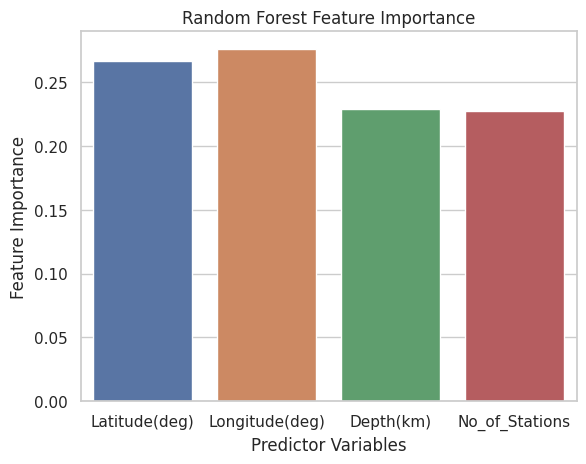

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path, delimiter=r'\s+')
    df.columns = ["Date(YYYY/MM/DD)", "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)",
                  "Magnitude(ergs)", "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

    ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
    df.index = ts
    df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1, inplace=True)

    return df

# Function to train a Random Forest model
def train_random_forest_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    return model

# Function to evaluate the model and print scores
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

# Function to make predictions on new data
def predict_new_data(model, new_data):
    new_pred = model.predict(new_data)
    return new_pred

# Function to create visualization of feature importance
def visualize_feature_importance(model, X_train):
    feature_importance = model.feature_importances_
    predictors = ['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']

    plt.figure()
    sns.barplot(x=predictors, y=feature_importance)
    plt.xlabel('Predictor Variables')
    plt.ylabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.show()

def main():
    # Load and preprocess the data
    file_path = 'Earthquake_Data.csv'
    df = load_and_preprocess_data(file_path)
    print("Data loaded and preprocessed successfully.")

    # Select relevant columns
    X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
    y = df['Magnitude(ergs)']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the Random Forest model
    model = train_random_forest_model(X_train, y_train)
    print("Random Forest model trained successfully.")

    # Evaluate the model
    evaluate_model(model, X_test, y_test)

    # Define new data points
    new_data = [[33.89, -118.40, 16.17, 11], [37.77, -122.42, 8.05, 14]]

    # Predict using the trained model
    new_pred = predict_new_data(model, new_data)
    print("New predictions:", new_pred)

    # Visualize feature importance
    visualize_feature_importance(model, X_train)

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path, delimiter=r'\s+')
    df.columns = ["Date(YYYY/MM/DD)", "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)",
                  "Magnitude(ergs)", "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

    ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
    df.index = ts
    df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1, inplace=True)

    return df

# Function to train an SVM regression model
def train_svm_model(X_train, y_train):
    model = SVR(kernel='linear')
    model.fit(X_train, y_train)
    return model

# Function to evaluate the model and print scores
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print("R^2: {:.2f}, MSE: {:.2f}".format(r2, mse))

# Function to make predictions on new data
def predict_new_data(model, new_data):
    new_pred = model.predict(new_data)
    return new_pred

def main():
    # Load and preprocess the data
    file_path = 'Earthquake_Data.csv'
    df = load_and_preprocess_data(file_path)
    print("Data loaded and preprocessed successfully.")

    # Select relevant columns
    X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
    y = df['Magnitude(ergs)']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the SVM regression model
    model = train_svm_model(X_train, y_train)
    print("SVM model trained successfully.")

    # Evaluate the model
    evaluate_model(model, X_test, y_test)

    # Define new data points
    new_data = [[33.89, -118.40, 16.17, 11], [37.77, -122.42, 8.05, 14]]

    # Predict using the trained model
    new_pred = predict_new_data(model, new_data)
    print("New predictions:", new_pred)

if __name__ == "__main__":
    main()


Data loaded and preprocessed successfully.
SVM model trained successfully.
R^2: -0.04, MSE: 0.20
New predictions: [3.36595597 3.26190932]


##SVM

<h3>Loading the model and fitting it with training data</h3>

In [ ]:
from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)


Test score: -3.0253513058608723


<h3>Predict the testing data</h3>
Find the predicted values and evaluate it using metrics like MSE, r2

In [ ]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

# Append the SVM scores to the 'scores' dictionary
scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

# Print the SVM evaluation results
print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))


SVM R^2: -3.03, MSE: 0.80


<h3>Predict for new data</h3>



In [ ]:
# Assuming you have already trained the SVM model (svm) before this step

# Predict on new data
new_pred_svm = svm.predict(new_data)

# Print the SVM predictions
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [3.52381059 3.12400954]


<h3>Plot model</h3>

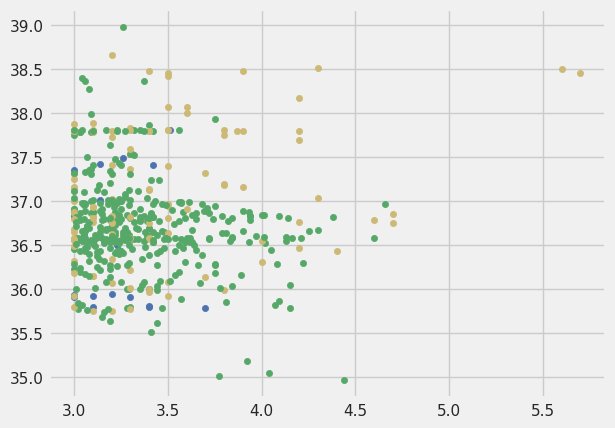

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.svm import SVC

style.use('fivethirtyeight')

# create mesh grids
def make_meshgrid(x, y, h =.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# plot the contours
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# color = ['y', 'b', 'g', 'k']

subset_size = 500

# modify the column names based on the dataset
features = df[['Magnitude(ergs)','Latitude(deg)']][:subset_size].values
classes = df['Magnitude_type'][:subset_size].values

# create 3 svm with rbf kernels
svm1 = SVC(kernel ='rbf')
svm2 = SVC(kernel ='rbf')
svm3 = SVC(kernel ='rbf')
svm4 = SVC(kernel ='rbf')

# fit each svm's
svm1.fit(features, (classes=='ML').astype(int))
svm2.fit(features, (classes=='Mx').astype(int))
svm3.fit(features, (classes=='Md').astype(int))

fig, ax = plt.subplots()
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot the contours
'''
plot_contours(ax, svm1, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.8)
plot_contours(ax, svm2, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.3)
plot_contours(ax, svm3, xx, yy, cmap = plt.get_cmap('hot'), alpha = 0.5)
'''
color = ['y', 'b', 'g', 'k', 'm']



for i in range(subset_size):
    if classes[i] == 'ML':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[0])
    elif classes[i] == 'Mx':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[1])
    elif classes[i] == 'Md':
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[2])
    else:
        plt.scatter(features[i][0], features[i][1], s = 20, c = color[4])
plt.show()

In [ ]:
print(df.columns)
df['Magnitude_type'].unique()

Index(['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'Magnitude(ergs)',
       'Magnitude_type', 'No_of_Stations', 'Gap', 'Close', 'RMS', 'SRC',
       'EventID'],
      dtype='object')


array(['Mx', 'ML', 'Md'], dtype=object)

##Random Forest

<h3>Loading the model and fitting it with training data</h3>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<h3>Predict the testing data and evaluate it</h3>
Find the predicted values and evaluate it using metrics like MSE, r2

In [ ]:
# Evaluate the performance of the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Append the scores to the 'scores' dictionary
scores['mse'].append(mse)
scores['R^2'].append(r2)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 0.19703365001029474
R^2 Score: 0.00645217815972543


<h3>Plot model</h3>

**Scatter plot**

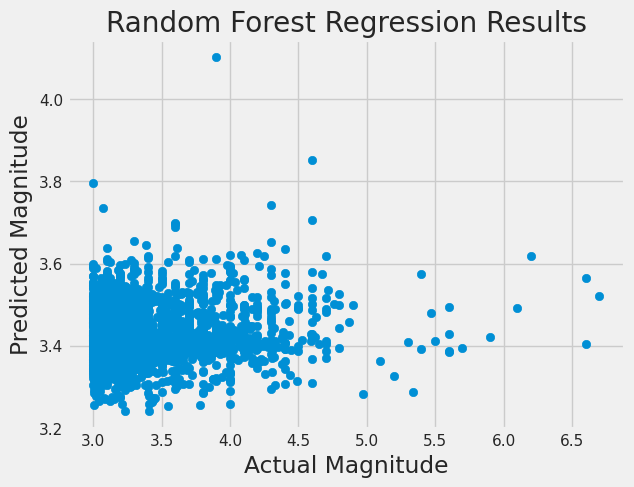

In [ ]:
# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()

**Feature Importance**<br>
This plot shows the importance of each feature in the model. You can create a feature importance plot using the feature_importances_ attribute of the random forest model.

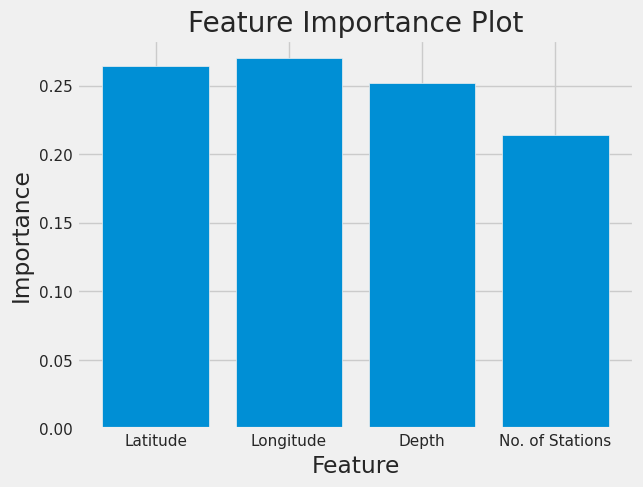

In [ ]:
importances = rf.feature_importances_
features = ['Latitude', 'Longitude', 'Depth', 'No. of Stations']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

**Residual Plot**<br>
A residual plot shows the difference between the actual values and the predicted values. You can create a residual plot using the residplot() function from the seaborn library.

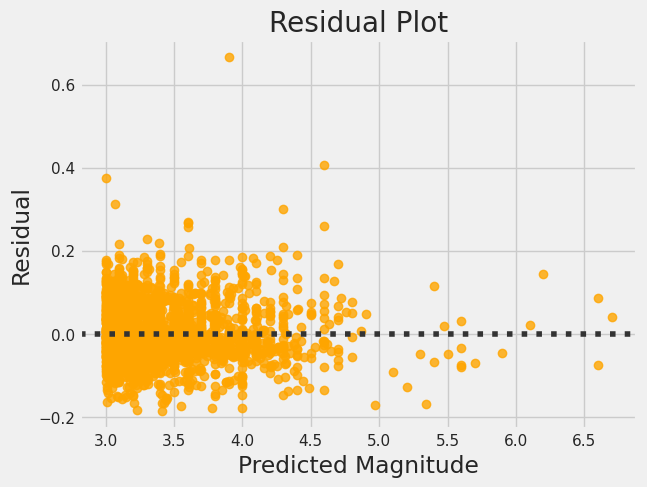

In [ ]:
import seaborn as sns
sns.residplot(x= y_test, y =y_pred, color='orange')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

**Actual vs. Predicted Line Plot**<br>
Actual vs. Predicted Line Plot: A line plot can be used to show the trend of the actual and predicted values over time (if the data is time-series). You can create a line plot using the plot() function.

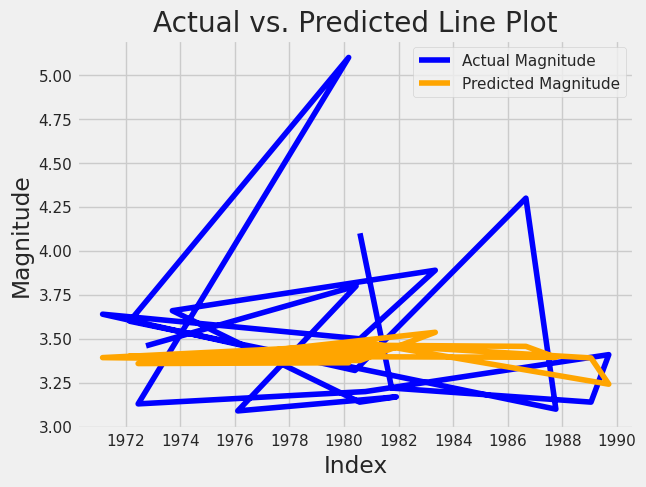

In [ ]:
plt.plot(y_test.index[:20], y_test[:20], color='blue', label='Actual Magnitude')
plt.plot(y_test.index[:20], y_pred[:20], color='orange', label='Predicted Magnitude')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.show()

<h2>Concluding the accurate model</h2>

In [ ]:
scores_df = pd.DataFrame(scores)
display(scores_df)

Model name       mse       R^2
0  Linear regression  0.197034  0.006452
1                SVM  0.798280 -3.025351
2      Random Forest  0.197034  0.006452

In [ ]:
scores_df[scores_df["mse"] == scores_df["mse"].min()]

Model name       mse       R^2
0  Linear regression  0.197034  0.006452
2      Random Forest  0.197034  0.006452

In [ ]:
scores_df[scores_df["R^2"] == scores_df["R^2"].max()]

Model name       mse       R^2
0  Linear regression  0.197034  0.006452
2      Random Forest  0.197034  0.006452

From the above result we can conclude that random forest is the most accurate model for predicting the magnitude of Earthquake compared to all other models used in this project.